In [1]:
import scanpy as sc
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', facecolor=None)
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/tornado/ioloop.py:265: DeprecationWarning: There is no current event loop
  loop = asyncio.get_event_loop()
/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 pynndescent==0.5.7


/home/icb/yuge.ji/miniconda3/envs/test_env3/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
import sys
sys.path.append("../scripts/")
import benchmarking

In [11]:
path = '../outputs/'
ranking_files = {
    'ablation': 'ablation/task1_latent.csv',
    'de': 'differential_expression/norman_DE_control.csv',
    'eg_abssum': 'expected_gradients/task_1_absolute_expected_grads.csv',
    'ig_abssum': 'integrated_gradients/task_1_absolute_integrated_grads.csv',
    'mean': 'baselines/task1_mean.csv',
    'random': 'baselines/task1_random.csv',
}
ranking_dfs = {explainer: pd.read_csv(path + file_name, index_col=0) for explainer, file_name in ranking_files.items()}

Invert DE because p-values go in the wrong direction.

In [12]:
ranking_dfs['de'] = -ranking_dfs['de']

In [13]:
auc_scores = dict()
for explainer, df in ranking_dfs.items():
    print(explainer)
    auc_scores[explainer] = benchmarking.roc_auc_crispr(df)

ablation
de
eg_abssum
ig_abssum
mean
random


Note that `mean` only achieves such a high score here because we've trained on Norman19, a CRISPRa dataset. It would definitely not be the case for a CRISPRi/ko screen.

In [14]:
auc_scores

{'ablation': 0.6588555441106871,
 'de': 0.9705116784053898,
 'eg_abssum': 0.814174520836362,
 'ig_abssum': 0.8330812369118652,
 'mean': 0.8689830667503894,
 'random': 0.45590941850789857}

/tmp/ipykernel_149233/2292221054.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


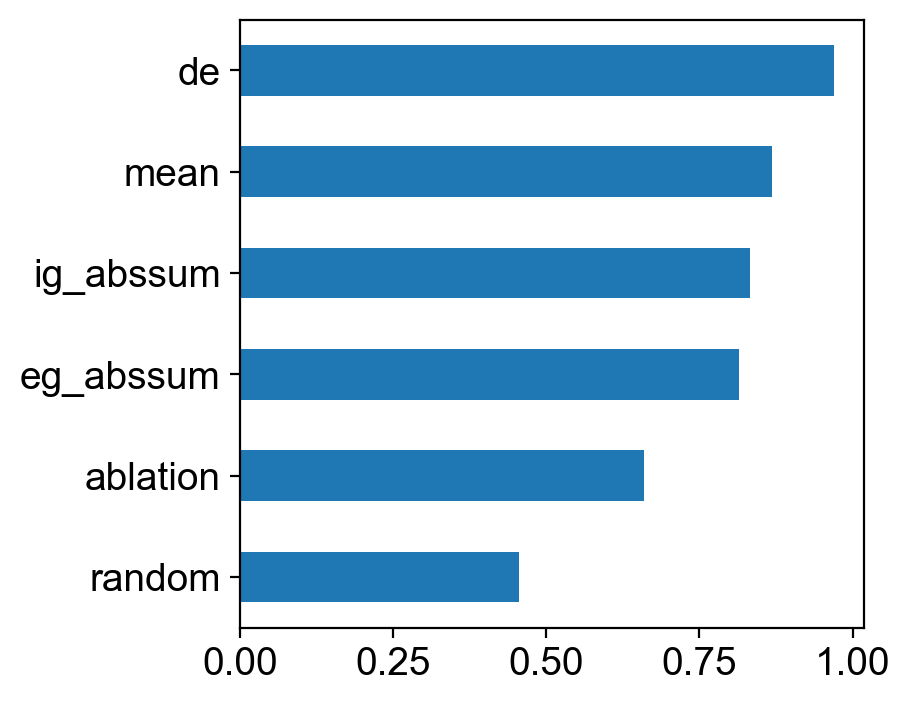

In [15]:
pd.DataFrame.from_dict(auc_scores, orient='index').sort_values(by=0).plot.barh(legend=None)
plt.grid(b=False)

In [9]:
from de_utils import enrich

In [ ]:
# base_path = '/home/icb/yuge.ji/projects/feature-attribution-sc'
# adata = sc.read(f'{base_path}/datasets/scgen_norman19.h5ad')